# Collection made by a movie using Decision tree, ensemble learning with boasting

So in this exercise we are going to use a data set to predict the money collection made by a movie based 17 parameters. So out data set has 18 columns and 506 data points. Most of them are numerical data but there are 2 catagorical variables.Lets dive into the problem by first importing the required packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Movie_data.csv',header=0)
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

We find that only Time_taken feature has some missing values and the rest of the columns have all the required data. Since this is simulated data and not real time data, most of the data is present. In case of real time data, many features would have missing data. Let now impute our missing data with the median of the Time_Taken feature data.

In [4]:
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

We now find that 12 data points are missing in the Time_taken feature. Now lets imput the data

In [5]:
median=data['Time_taken'].median()
#print(median)
data['Time_taken'].fillna(value=median,inplace=True)
#print(data.isnull().sum().sum())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Now we convert the catagorical variable data into numerical values by using the get_dummies method from pandas

In [6]:
data=pd.get_dummies(data,columns=['3D_available','Genre'],drop_first= True)
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


Now we create out X and y variables.

In [7]:
Y=data['Collection']
X=data.loc[:, data.columns!='Collection']
a=["Marketing expense","Production expense","Multiplex coverage","Budget","Movie_length","Lead_ Actor_Rating","Lead_Actress_rating","Director_rating","Producer_rating","Critic_rating","Trailer_views","Time_taken","Twitter_hastags","Avg_age_actors","Num_multiplex","3D_available_YES","Genre_Comedy","Genre_Drama","Genre_Thriller"]

Now since the features are not in the scale, we scale the X data so that all the features have the same impact on the output

In [8]:
from sklearn.preprocessing import StandardScaler 
scalar=StandardScaler()
X_Scaled=scalar.fit_transform(X)
X_Scaled

array([[-0.41978194, -1.2879095 ,  0.14421743, ..., -0.66452648,
        -0.48699468,  1.32854331],
       [-0.41733926, -0.59338101,  0.74026221, ..., -0.66452648,
         2.05341054, -0.7527041 ],
       [-0.41734159, -0.59338101,  0.74026221, ...,  1.50483093,
        -0.48699468, -0.7527041 ],
       ...,
       [-0.41344658,  0.11573841, -0.15812412, ...,  1.50483093,
        -0.48699468, -0.7527041 ],
       [-0.40776407,  0.11573841, -0.15812412, ...,  1.50483093,
        -0.48699468, -0.7527041 ],
       [-0.41500016,  0.11573841, -0.15812412, ...,  1.50483093,
        -0.48699468, -0.7527041 ]])

Now we split the data into testing and training data using the test_train_split fucntion from sklearn

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.2, random_state=31)

## Controlling the growth of a tree
Now we use the Decision tree Regression model to train our model.
In any decision tree model, the model can be controlled from overifiitng and excess computation by pruning the tree, basically restricting the growth of the tree with respect to splitting.
There are 3 ways of prunning:
1. Maximum levels in the tree: This is basically restricting the number of splits or layers in the tree.
2. Minimum number of observations in the at the internal node: In the hyperparameter, the node splits only if the number of samples present at that node is more than the specified minimum.
3.  Minimum number of observations at the leaf node: In this hyperparameter we can control the number of samples in the leaf node, the leaf node will have more the specified number of samples.

In [10]:
from sklearn.tree import DecisionTreeRegressor
DectreeReg=DecisionTreeRegressor(max_depth=5)
DectreeReg.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Now we find the accuracy of the model

In [11]:
DectreeReg.score(X_test,y_test)

0.7654211000925815

Now we plot the decision tree

In [12]:
from sklearn import tree
dot_data=tree.export_graphviz(DectreeReg,out_file=None,feature_names=a)
from IPython.display import Image
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [13]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

We can see that the growth of the tree can be restricted by prunning and thus preventing overfitting.

## Ensemble Learning
Since decision trees have a lot of variance, we can use emsemble learning to improve our model. There are 3 types of Ensemble learning:
1. Bagging
2. Random Forests
3. Boasting


### Bagging
Let's first start with Bagging technique

In [14]:
from sklearn import tree
classifier=tree.DecisionTreeRegressor()

In [15]:
from sklearn.ensemble import BaggingRegressor

In [16]:
Dec_bag=BaggingRegressor(base_estimator=classifier,n_estimators=1000,bootstrap=True,random_state=31)
Dec_bag.fit(X_train,y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [17]:
Dec_bag.score(X_test,y_test)

0.7961383916999621

With bagging we can see a clear increase in the accuracy

## Random Forest
Lets try with random forest 


In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf=RandomForestRegressor(n_estimators=1000,random_state=31)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7992558637323156

This is again better than our original Decision tree

## Boasting
Lets try boasting techniques


The major difference between boasting and bagging is that the growth of the tree is not controlled.
There are 3 types of boasting:
1. Gradient Boost
2. Ada boost
3. XG boost

### Gradient boost
Lets start with Gradient Boast

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
gbr=GradientBoostingRegressor(learning_rate=0.02,n_estimators=1000)
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

0.8523761275831798

We clearly get a better accuracy in booting. This is because booting focusses on the results with largest residuals.

### Ada boost
Now we try to compute the model with ada boost technique

In [22]:
from sklearn.ensemble import AdaBoostRegressor

In [23]:
abr=AdaBoostRegressor(base_estimator=rf,learning_rate=0.02,n_estimators=100)
abr.fit(X_train,y_train)
abr.score(X_test,y_test)

0.8250260392953679

### XG boost

Lets now try with XG boost

In [24]:
import xgboost as xgb

In [26]:
xbr=xgb.XGBRegressor(max_depth=5,n_estimators=10000,learning_rate=0.2,n_jobs=-1,gamma=0.1)
xbr.fit(X_train,y_train)
xbr.score(X_test,y_test)

[01:05:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8485143293197741

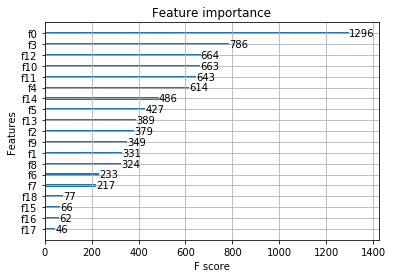

In [29]:
xgb.plot_importance(xbr)

#### XGBoost gives the best accuracy of 84.85%

We can clearly see the difference in the accuracy score between a regular decision tree model and a boosted model. There is a significant difference and Boosting techinques give the best results.


Now we can use grid search to tune our model to get the best results

In [35]:
xbr=xgb.XGBRegressor(learning_rate=0.2,n_estimators=250,random_state=31)
param={
    'max_depth':range(3,9,3),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[0.001,0.1,1]
}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(xbr,param,n_jobs=-1,cv=5)


In [41]:
grid_search.fit(X_train,y_train)

[01:42:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.2,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=250, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=31,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 9, 

In [49]:
grid_search.best_params_


{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 6,
 'reg_alpha': 0.001,
 'subsample': 0.9}

In [50]:
xgb_best=xgb.XGBRegressor(colsample_bytree=0.8,
 gamma= 0.2,
 max_depth=6,
 reg_alpha= 0.001,
 subsample=0.9)

In [51]:
xgb_best.fit(X_train,y_train)
xgb_best.score(X_test,y_test)

[01:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8420986963327745